In [7]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
X = 2 * np.random.rand(100, 1)

In [5]:
y = 4 + 3*X+np.random.randn(100, 1)

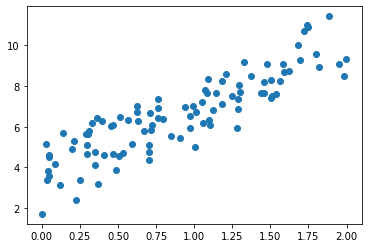

In [9]:
plt.plot(X, y, 'o')

In [24]:
X_b = np.c_[np.ones((100, 1)), X]

In [16]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [17]:
theta_best

array([[3.80252121],
       [3.08048806]])

In [27]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)

In [28]:
y_predict

array([[3.80252121],
       [9.96349732]])

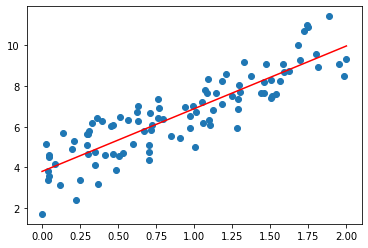

In [31]:
plt.plot(X, y, 'o')
plt.plot(X_new, y_predict, 'r')

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.80252121]), array([[3.08048806]]))

In [34]:
lin_reg.predict(X_new)

array([[3.80252121],
       [9.96349732]])

In [35]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)

In [36]:
theta_best_svd

array([[3.80252121],
       [3.08048806]])

In [37]:
np.linalg.pinv(X_b).dot(y)

array([[3.80252121],
       [3.08048806]])

In [38]:
eta = 0.1
n_iterations = 1000
m = 100

In [39]:
theta = np.random.randn(2, 1)

In [43]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [44]:
theta

array([[3.80252121],
       [3.08048806]])

In [45]:
n_epochs = 50
t0, t1 = 5, 50

In [48]:
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [49]:
theta

array([[3.81399821],
       [3.10624015]])

In [88]:
from sklearn.linear_model import SGDRegressor

In [51]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)

In [52]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [55]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81249507]), array([3.08976336]))

In [62]:
m=100
X = 6 * np.random.rand(m, 1)-3

In [63]:
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

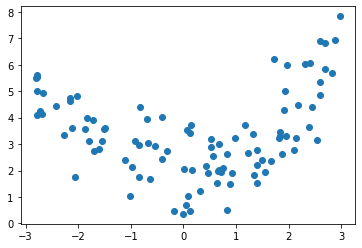

In [64]:
plt.plot(X, y, 'o')

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [67]:
X_poly = poly_features.fit_transform(X)

In [68]:
X[0]

array([-1.48803135])

In [69]:
X_poly[0]

array([-1.48803135,  2.21423729])

In [71]:
lin_reg = LinearRegression()

In [72]:
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
lin_reg.intercept_, lin_reg.coef_

(array([2.01914292]), array([[0.09782403, 0.45482981]]))

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [80]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_val_predict = model.predict(X_val)
        y_train_predict = model.predict(X_train[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'Train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 3, label = 'Val')

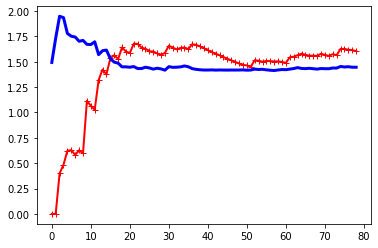

In [81]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
polynomial_regression = Pipeline([('poly_features', PolynomialFeatures(degree = 10, include_bias = False)),('lin_reg', LinearRegression())])

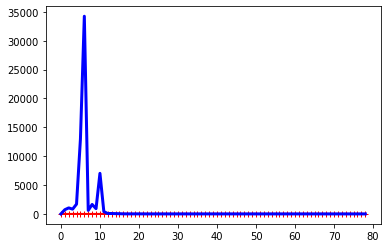

In [84]:
plot_learning_curves(polynomial_regression, X, y)

In [85]:
from sklearn.linear_model import Ridge

In [86]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky')
ridge_reg.fit(X, y.ravel())
ridge_reg.predict([[1.5]])

array([3.50050881])

In [90]:
sgd_reg = SGDRegressor(penalty = 'l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([3.47767596])